In [223]:
#from google.colab import drive 
#drive.mount('/content/drive') # remove the cell if colab is not used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

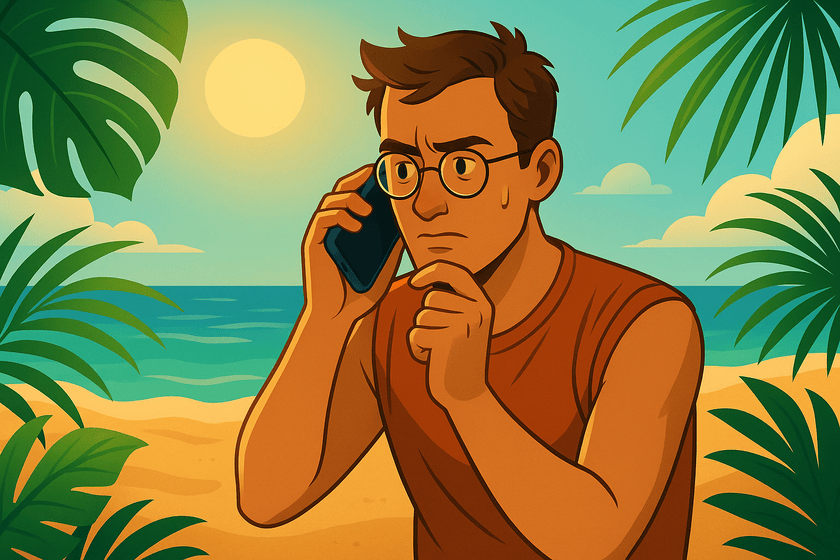

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [225]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

In [226]:
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 1. Usuwam kolumny 'Name', 'Ticket' i 'Cabin', ponieważ nie wnoszą istotnych informacji

In [227]:
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


### 2. Zmieniam typy danych na bardziej odpowiednie

In [228]:
titanic_df = titanic_df.convert_dtypes()
titanic_df['Age'] = titanic_df['Age'].astype(pd.Int64Dtype())
titanic_df.dtypes

Survived             Int64
Pclass               Int64
Sex         string[python]
Age                  Int64
SibSp                Int64
Parch                Int64
Fare               Float64
Embarked    string[python]
dtype: object

### 3. Uzupełniam brakujące dane

#### 'Age'
Wypełniam zgodnie z rozkładem

In [229]:
age_distribution = titanic_df['Age'].value_counts(normalize=True)
age_values = age_distribution.index
age_probs = age_distribution.values
missing_age_vals = titanic_df['Age'].isna()
titanic_df.loc[missing_age_vals, 'Age'] = np.random.choice(age_values, size=missing_age_vals.sum(), p=age_probs)

#### 'Fare'
Wypełniam zgodnie z rozkładem zaokrąglonych wartości

In [230]:
fare_distribution = titanic_df['Fare'].round().value_counts(normalize=True)
fare_values = fare_distribution.index
fare_probs = fare_distribution.values
missing_fare_vals = titanic_df['Fare'].isna()
titanic_df.loc[missing_fare_vals, 'Fare'] = np.random.choice(fare_values, size=missing_fare_vals.sum(), p=fare_probs)

#### 'Embarked'
Nieznane wartości wypełniam modą

In [231]:
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

### 4. Dodaję nowe kolumny

#### 'Family'
Suma małżonkow, rodzeństwa, dzieci i rodziców na pokładzie

In [232]:
new_column = pd.Series(data=titanic_df['Parch']+titanic_df['SibSp'], index=titanic_df.index, name='Family')
titanic_df = titanic_df.join(new_column)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,male,22,1,0,7.25,S,1
2,1,1,female,38,1,0,71.2833,C,1
3,1,3,female,26,0,0,7.925,S,0
4,1,1,female,35,1,0,53.1,S,1
5,0,3,male,35,0,0,8.05,S,0
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0,S,0
888,1,1,female,19,0,0,30.0,S,0
889,0,3,female,19,1,2,23.45,S,3


#### 'Child'

In [233]:
is_child = titanic_df['Age'] <= 5
titanic_df['Child'] = 0
titanic_df.loc[is_child, 'Child'] = 1
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Child
PassengerId,,,,,,,,,,
1,0,3,male,22,1,0,7.25,S,1,0
2,1,1,female,38,1,0,71.2833,C,1,0
3,1,3,female,26,0,0,7.925,S,0,0
4,1,1,female,35,1,0,53.1,S,1,0
5,0,3,male,35,0,0,8.05,S,0,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0,S,0,0
888,1,1,female,19,0,0,30.0,S,0,0
889,0,3,female,19,1,2,23.45,S,3,0


### 5. Zakodowuję dane 

#### 'Sex'

In [234]:
titanic_df['Sex'] = titanic_df['Sex'].map({'female':0, 'male':1})
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Child
PassengerId,,,,,,,,,,
1,0,3,1,22,1,0,7.25,S,1,0
2,1,1,0,38,1,0,71.2833,C,1,0
3,1,3,0,26,0,0,7.925,S,0,0
4,1,1,0,35,1,0,53.1,S,1,0
5,0,3,1,35,0,0,8.05,S,0,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27,0,0,13.0,S,0,0
888,1,1,0,19,0,0,30.0,S,0,0
889,0,3,0,19,1,2,23.45,S,3,0


#### 'Embarked'

In [235]:
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S':0, 'Q':1, 'C':2})
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Child
PassengerId,,,,,,,,,,
1,0,3,1,22,1,0,7.25,0,1,0
2,1,1,0,38,1,0,71.2833,2,1,0
3,1,3,0,26,0,0,7.925,0,0,0
4,1,1,0,35,1,0,53.1,0,1,0
5,0,3,1,35,0,0,8.05,0,0,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27,0,0,13.0,0,0,0
888,1,1,0,19,0,0,30.0,0,0,0
889,0,3,0,19,1,2,23.45,0,3,0


### 6.Rozkłady, poszukiwanie outlierów

In [236]:
def plot_distribiution(df, column, color):
    plt.figure(figsize=(12, 5))

    # 1st plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color=color)
    plt.title(f'Distribution of {column}')

    # 2nd plot
    plt.subplot(1, 2, 2)
    sns.histplot(x=df[column], color=color)
    plt.title(f'Distribution of {column}')

    plt.show()

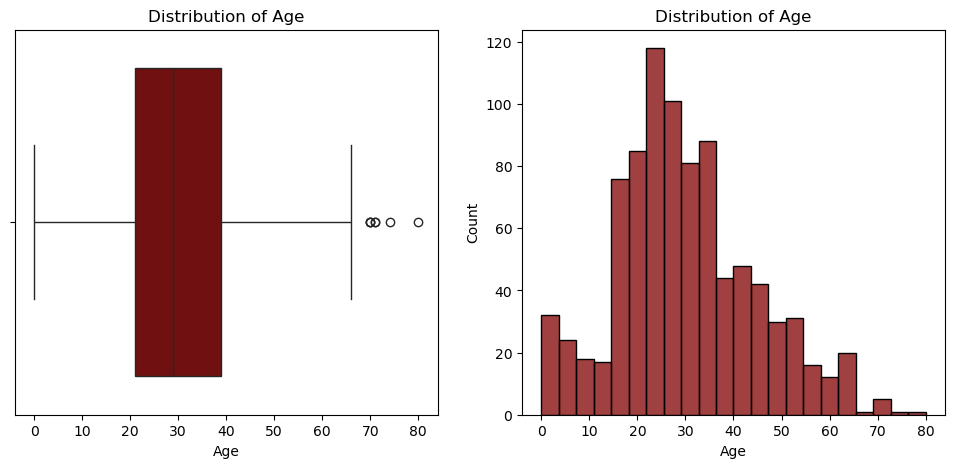

In [237]:
plot_distribiution(titanic_df, 'Age', 'maroon')

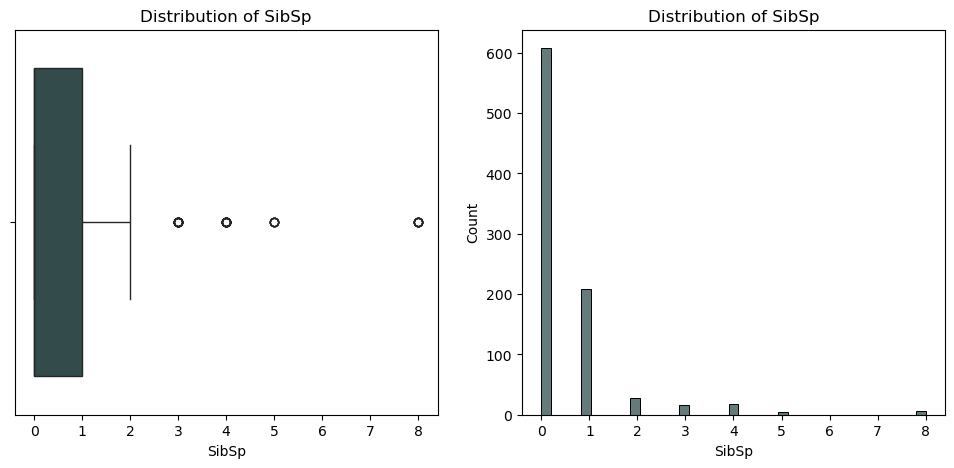

In [238]:
plot_distribiution(titanic_df, 'SibSp', 'darkslategray')

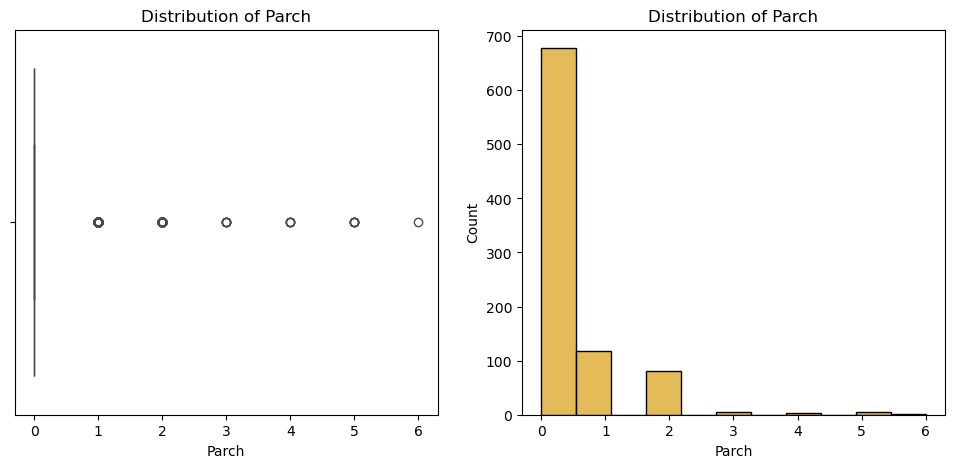

In [239]:
plot_distribiution(titanic_df, 'Parch', 'goldenrod')

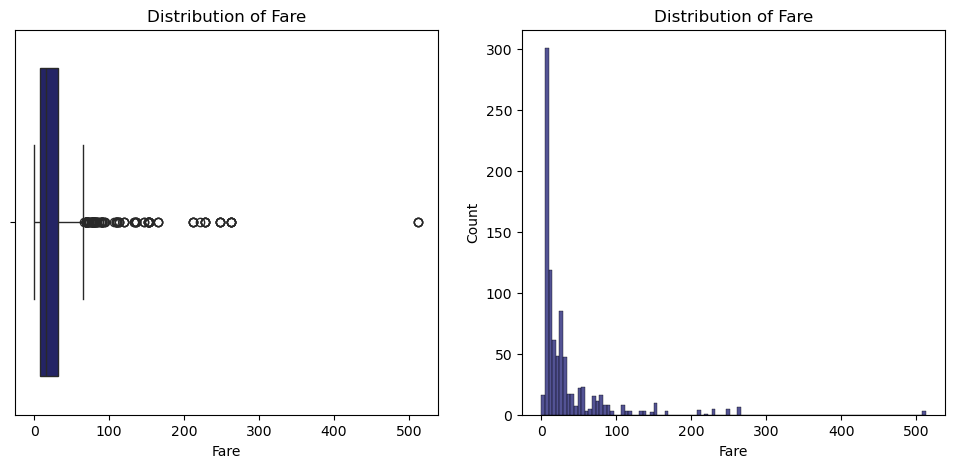

In [240]:
plot_distribiution(titanic_df, 'Fare', 'midnightblue')

### 7. Wizualizacje

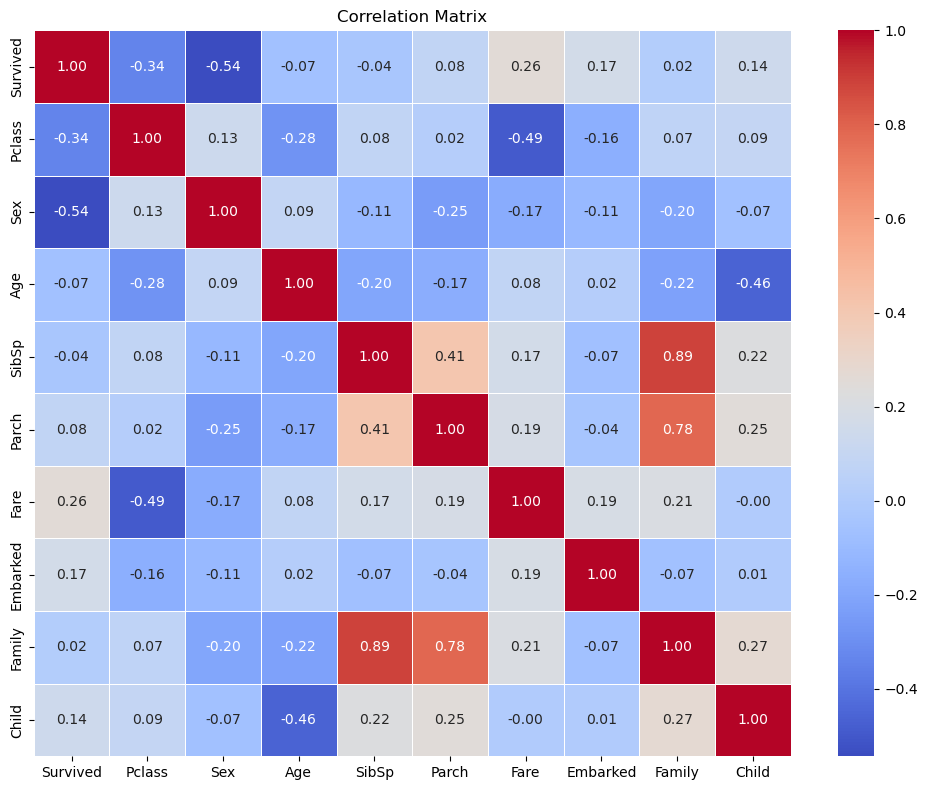

In [241]:
corr = titanic_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [242]:
def plot_bar_stacked(cond, column, l1, l2, c1, c2):
    y1 = titanic_df.loc[cond][column].value_counts()
    y2 = titanic_df.loc[~cond][column].value_counts()

    df = pd.DataFrame({l1: y1, l2: y2})

    df.plot(kind='bar', stacked=True, color=[c1, c2], edgecolor='black', ylabel='Count')

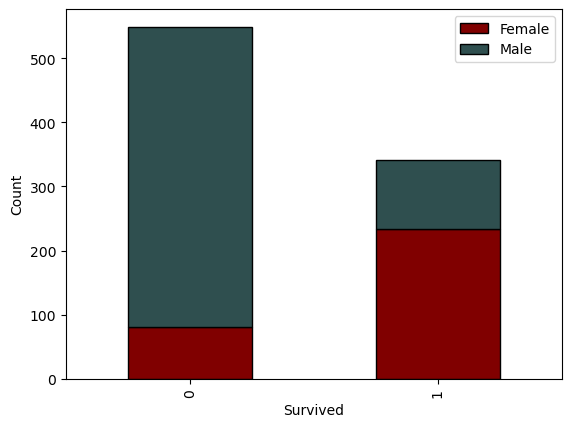

In [243]:
plot_bar_stacked(titanic_df['Sex']==0, 'Survived', 'Female', 'Male', 'maroon', 'darkslategray')

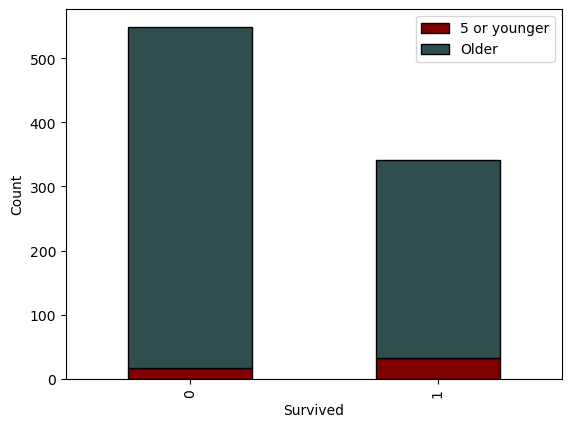

In [244]:
plot_bar_stacked(titanic_df['Child']==1, 'Survived', '5 or younger', 'Older', 'maroon', 'darkslategray')

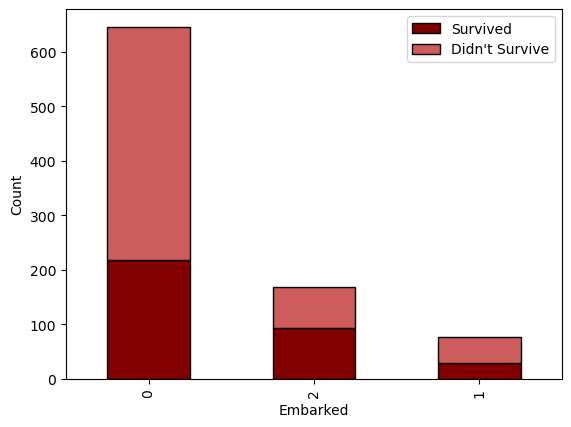

In [245]:
plot_bar_stacked(titanic_df['Survived']==1, 'Embarked', 'Survived', "Didn't Survive", 'maroon', 'indianred')

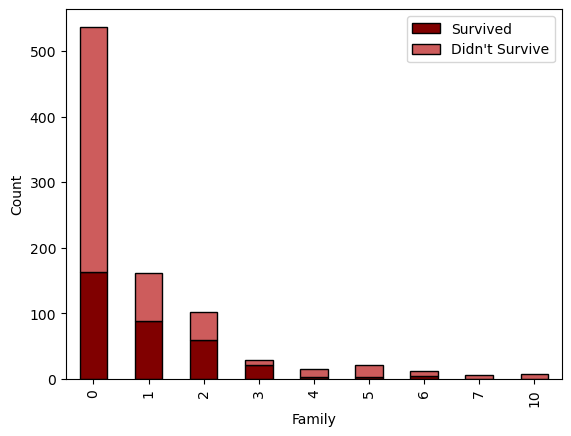

In [246]:
plot_bar_stacked(titanic_df['Survived']==1, 'Family', 'Survived', "Didn't Survive", 'maroon', 'indianred')

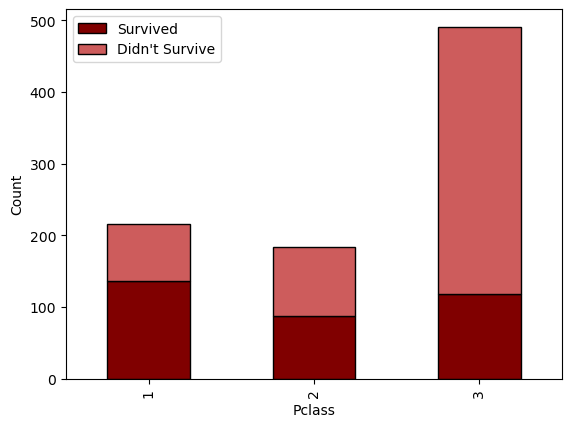

In [247]:
plot_bar_stacked(titanic_df['Survived']==1, 'Pclass', 'Survived', "Didn't Survive", 'maroon', 'indianred')

<Axes: xlabel='Survived', ylabel='Fare'>

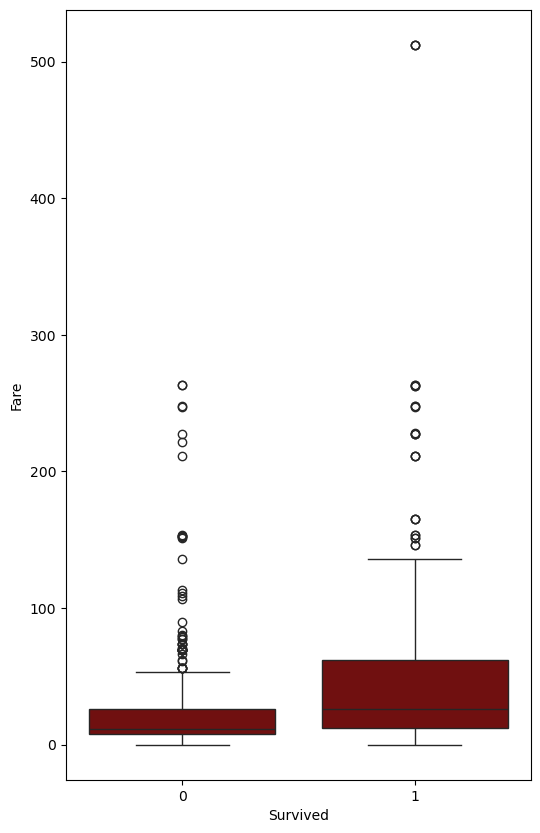

In [248]:
plt.figure(figsize=(6, 10))
sns.boxplot(data=titanic_df, x='Survived', y='Fare', color='maroon')

<Axes: xlabel='Survived', ylabel='Age'>

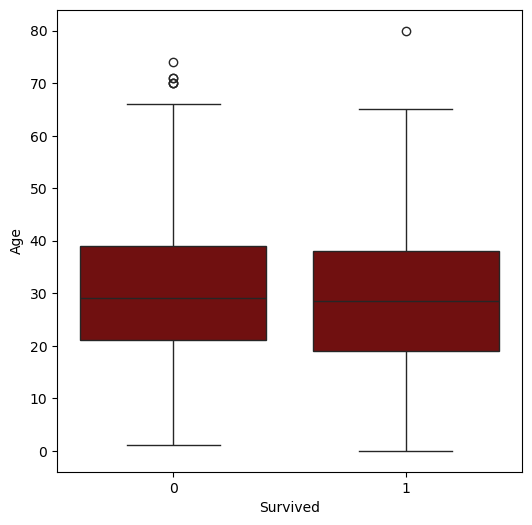

In [249]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=titanic_df, x='Survived', y='Age', color='maroon')